# STUDENT GRADE PREDICTION

## Description
This notebook aims to use several regression models to predict the grade/score of a portuguese secondary school's student.

The dataset consists of data coming from students in two portuguese public schools. Two datasets are provided and consisting on performances on two major subjects that are "Mathematics" and "Portuguese language". Data attributed are from the 2005-2006 school year and were collected through schools reports and questionnaire answers. 
We will focus ourselves on the Mathematic subject dataset.

The file student_description.txt contains the description of the attribute.

In the context of this dataset, we want to predict the final year grade/score; It is encoded as the attribute named "G3" in the datasets. We also have "G1" and "G2" scores/grades which are scores obtained in the course of the year (kind of mid-term exams).

The dataset was issued by of P. Cortez and A. Silva and you can have more details on their work in their following paper


> [P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.](http://www3.dsi.uminho.pt/pcortez/student.pdf) 


## Loading Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', 100)
DATASET_PATH = os.path.join("..","datasets","portuguese_student_grades")

In [2]:
df = pd.read_csv(os.path.join(DATASET_PATH,"student-mat.csv"))

In [3]:
print("Number of math students: %d"%(df.shape[0]))
print("Number of features: %d"%(df.shape[1]))
print("List of attributes : %s"%list(df.columns))
df.head(10)

Number of math students: 395
Number of features: 33
List of attributes : ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


'sex'

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We have no null in our dataset. This is very rare for a dataset but we may be lucky. Let us study probability distributions

F    208
M    187
Name: sex, dtype: int64


Text(0.5, 1.0, 'Distribution of final grades per sex')

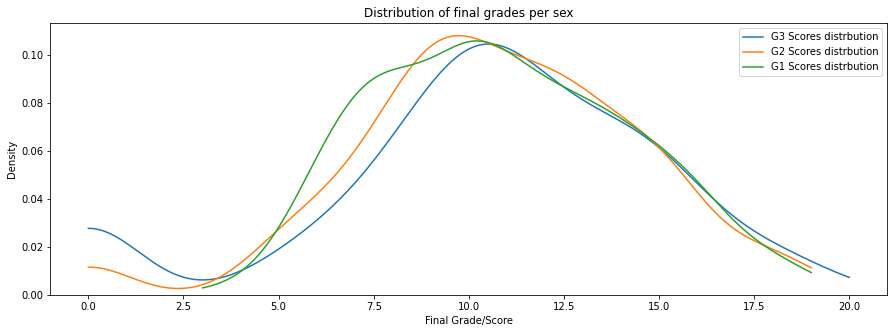

In [6]:
print(df["sex"].value_counts())
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))


sns.kdeplot(data=df,x="G3", ax=ax,label="G3 Scores distrbution",cut=0)
sns.kdeplot(data=df,x="G2",  ax=ax,label="G2 Scores distrbution",cut=0)
sns.kdeplot(data=df,x="G1", ax=ax,label="G1 Scores distrbution",cut=0)
ax.legend()
ax.set_xlabel("Final Grade/Score")
ax.set_title("Distribution of final grades per sex")


In [19]:
categorical_variables = list(df.select_dtypes(include=["object"]).columns)

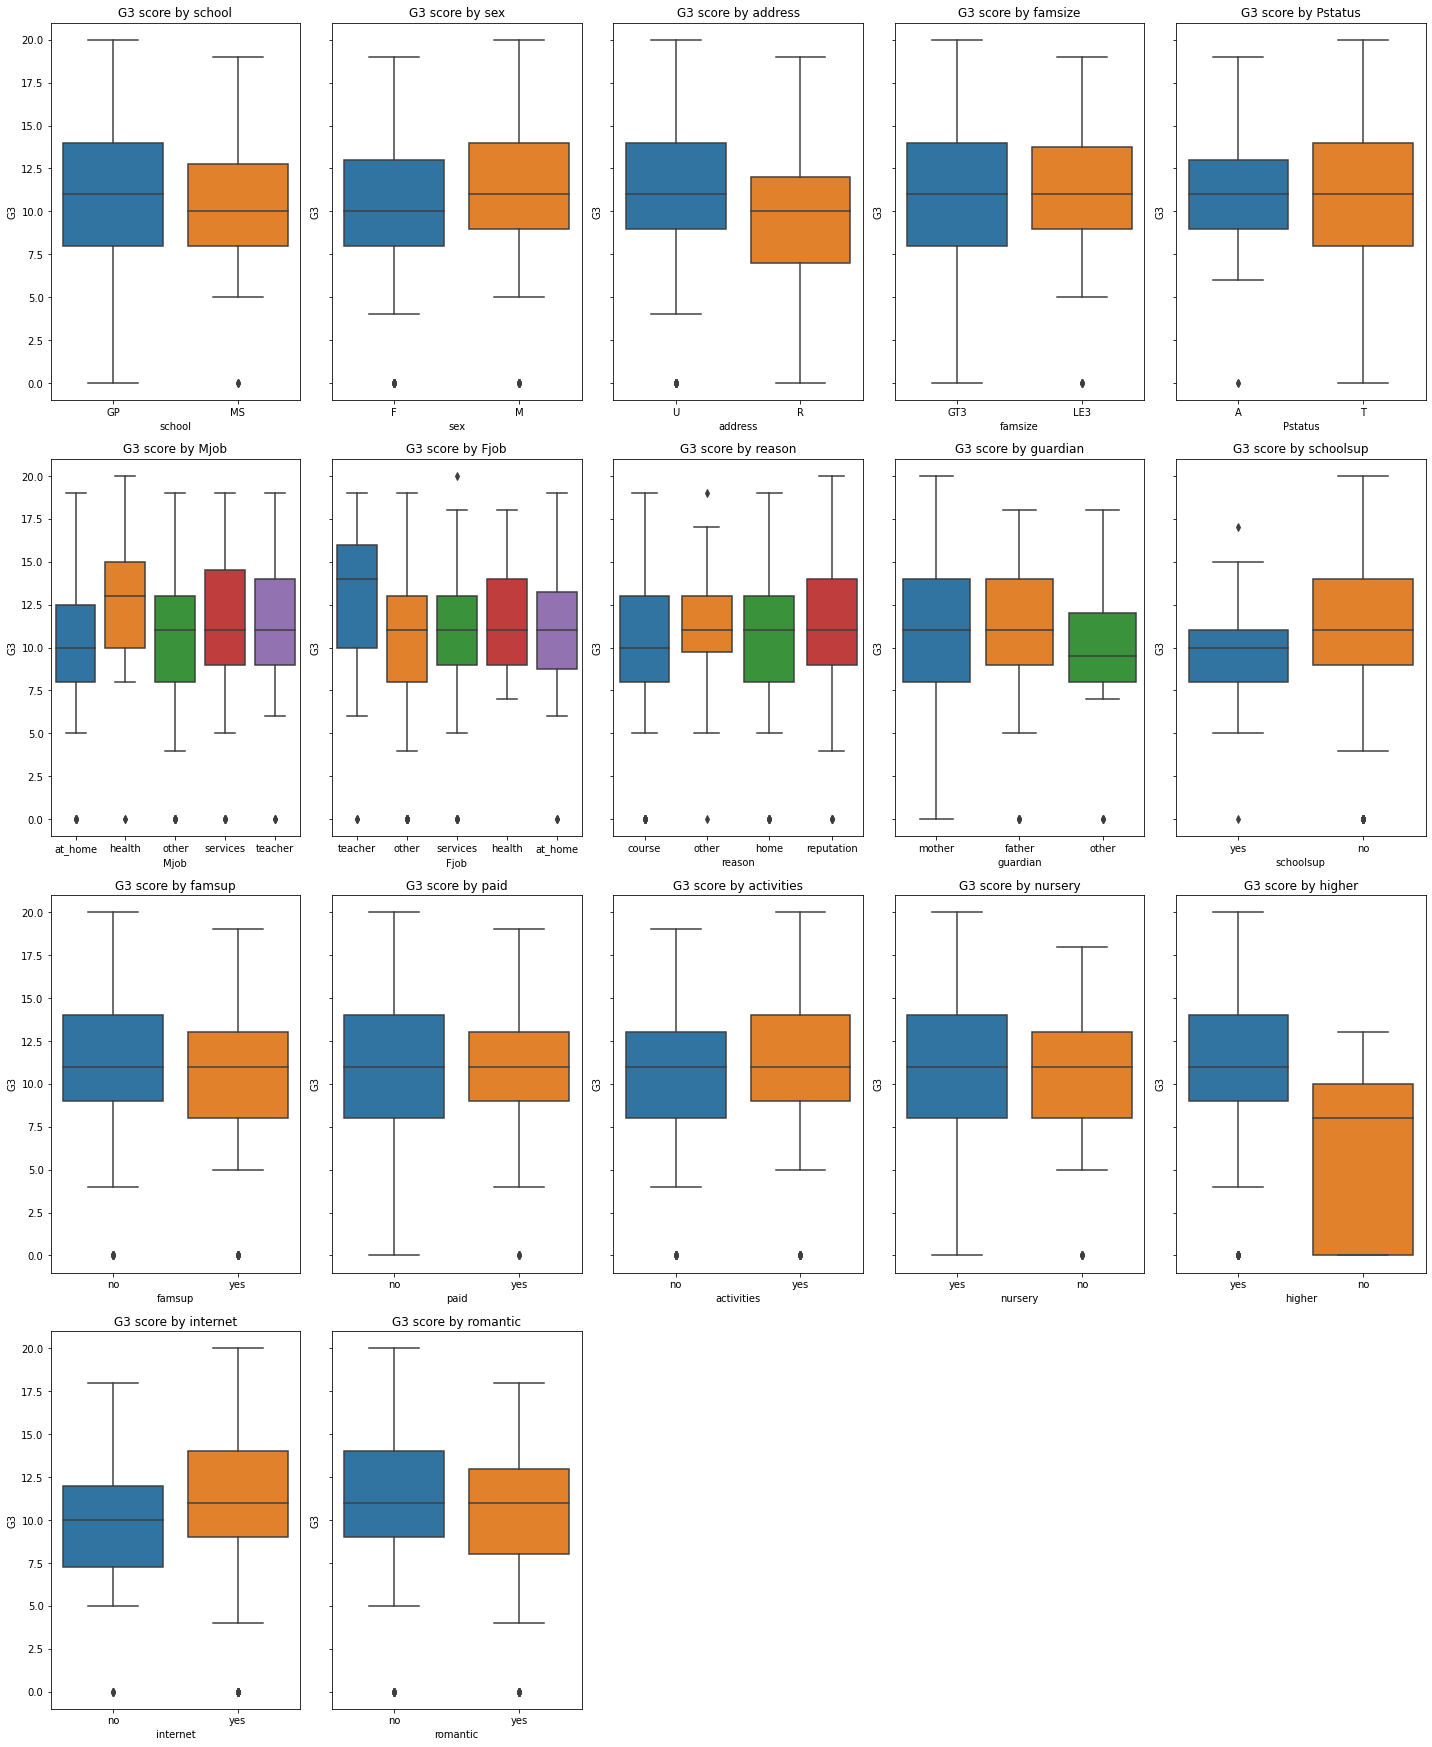

In [90]:
num_variable = len(categorical_variables)
n = np.ceil(np.sqrt(num_variable))
plt.figure(figsize=(20,30),tight_layout=True)
for i,c in enumerate(categorical_variables):
    plt.subplot(n,n,i+1)
    ax = sns.boxplot(data=df[["G3",c]],x=c,y="G3")
    ax.set_title("G3 score by %s"%c)
    if (i+1)%n!=1:
        ax.set_yticklabels([])


 Il faut rajouter les variables ordinale (goout)
 Etudier les variables numériques